# Finals Summary 9-12


## Word Cloud

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1. make a df out of this 'tripadvisor_hotel_reviews.csv'
2. rename all columns to be in lowercase letters
3. make a word cloud with the first 2000 reviews, but only the nouns
    (remember to tokenize and use only words/numbers)
    (remember to lemmatize, so that words aren't presented double)
4. change the size of the figure
5. save the wordcloud as a png

THERE IS MORE WAYS ON HOW TO COLOR THE WORD CLOUDS ETC. IN WEEK9

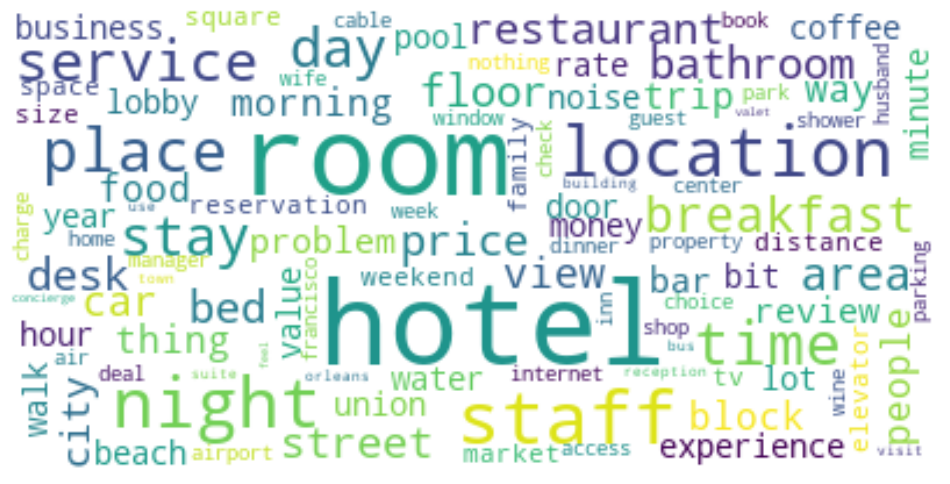

In [2]:
reviews = pd.read_csv('resources/tripadvisor_hotel_reviews.csv')
# reviews = reviews.rename(columns=dict(zip(reviews.columns, [re.lower() for re in reviews.columns]))) ToDo this was my solution but the other one is better
reviews = reviews.rename(columns=str.lower)

tokens = nltk.word_tokenize(" ".join(reviews.review[0:2000]))
filtered_tokens = [t for t in tokens if t.isalnum()]

nouns = [word for word, pos in nltk.pos_tag(filtered_tokens) if pos.startswith("N")]

wnl = WordNetLemmatizer()
lemmatized_nouns = [wnl.lemmatize(noun, pos='n') for noun in nouns]

freq_dis_nouns = nltk.FreqDist(lemmatized_nouns)

# Todo its actually [0:2000] because the last one isn't counted in
#wordcloud = WordCloud().generate(" ".join(lemmatized_nouns))

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate_from_frequencies(freq_dis_nouns)
plt.figure(figsize=(12,8))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')

wordcloud.to_file('review_nouns.png')

In [3]:
from PIL import Image  # to import an image: pillow as PIL
import requests
from nltk.corpus import stopwords
import re
import numpy as np

6. generate a wordcloud from upvote.png (use the shape and the color of the image)

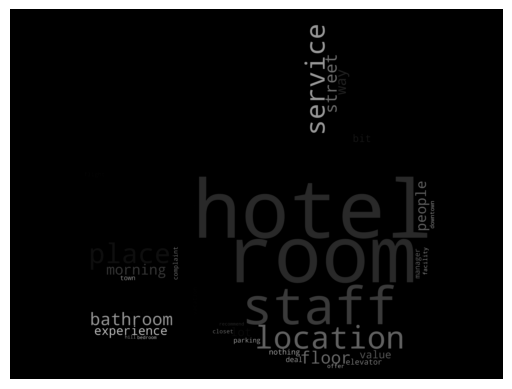

In [4]:
upvote_pic = np.array(Image.open('resources/upvote.png'))
image_colors = ImageColorGenerator(upvote_pic)

wordcloud = WordCloud(mask=upvote_pic, color_func=image_colors)
plt.axis('off')
plt.imshow(wordcloud.generate_from_frequencies(freq_dis_nouns), interpolation='bilinear')

## Social Network Analysis

In [5]:
import networkx as nx
from networkx.algorithms import community
from pyvis import network as net
from operator import itemgetter
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


- Create a graph
- add one node
- add 4 nodes
- draw the graph

- create a graph with 20 nodes that are added one at a time with a link to one previously added node (chosen uniformly at random) and to all of that node's successors.
- draw the graph

- create a binomial graph with 20 edges and the probability of 0.2 (not directed)
- draw the graph (there a two methods!!)
- draw the graph in a circular layout
- draw the graph G with a Kamada-Kawai force-directed layout
- draw the graph in a random layout
- draw the graph in a shell layout
- print all the info that you have of the graph

- create a complete graph with 8 nodes
- draw the graph in a shell layout

- create a gnc graph with 7 nodes
- draw the graph in a shell layout

- label all the nodes in the graph and draw it in a circular layout

- convert the graph to an undirected graph
- draw the graph G with a spectral 2D layout

- create a fruchterman-reingold-layout, add the figsize (5,5) and draw the network with labels
- print the info of the graph

DO THE ZACHARYS KARATE CLUB THING AND SEE IF THERE IS SOMETHING NEW IN THERE

## Supervised Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [ ]:
weather = ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Sunny',
           'Cloudy', 'Overcast', 'Rainy']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

1. encode categorical data into numerical data: weather, temperature and play
2. Then pair the numerical weather with the numerical temperature and print the result

3. KNN: perform knn on the paired result (use the play list)
4. predict a random pair (e.g., 'Sunny' and 'Cold')

KNN 2nd example - fruits
1. import the fruit.txt
2. print our all the categories of fruit there is
3. print out how many rows and columns the data has
4. print out how many there is of each fruit
5. print out all the info of the dataset
6. // Some countplor or something??

The goal is to make a model that given the mass, width and height of a fruit can determine the label of the fruit
1. split everything into train and test data
2. print out all the info of the X_train data set

3. plot the width, height and mass as a subplot 111 (with the train data)

4. use knn on the x_train and y_train
5. print out the score

5. make a look-up-dictionary so that the result will be printed out and not just the numerical value
6. print the result of a random fruit (e.g., 20, 6, 5.5)

KNN 3rd example - Iris
1. import the iris data set
2. print all the feature names
3. print the targets/species and the respective names

4. create a dataframe with sepal length and -width, petal length and -width, and the species
5. use iloc to split the dataframe in x and y
6. split the data in train and test data
7. print all the info about x_train

8. perform knn
9. predict with the test data
10. test the accuracy with the test data and print this